In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sea 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

# classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier


# **Завдання 1**

In [75]:
# https://www.kaggle.com/datasets/deepu1109/star-dataset
stars_data = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")
print(stars_data.shape)
print(stars_data.columns)

(240, 7)
Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


# **Завдання 2**

In [76]:
stars_data.isnull().sum()
# пропусків немає
stars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


# **Завдання 3**

# **Heatmap**

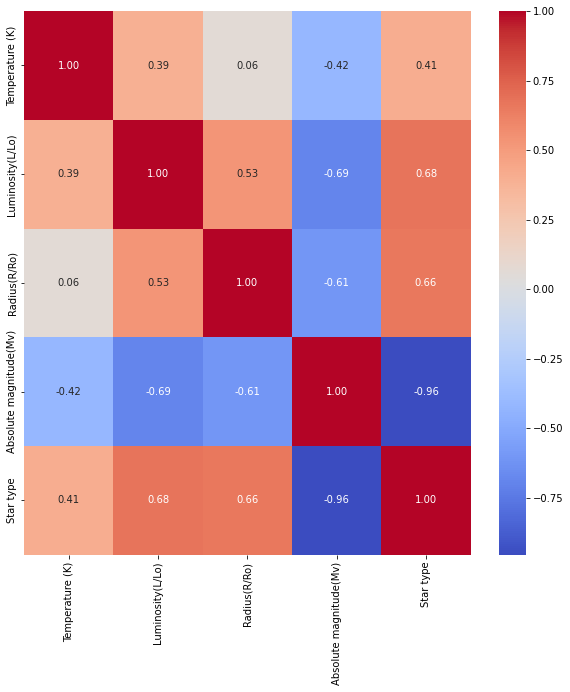

In [77]:
correlation = stars_data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sea.heatmap(correlation,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

# **Boxplots**

In [78]:
stars_data['Spectral Class'] = stars_data['Spectral Class'].astype( str )
stars_data = stars_data[stars_data["Spectral Class"].str.contains("G|K")== False ]

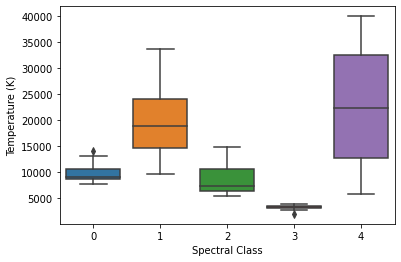

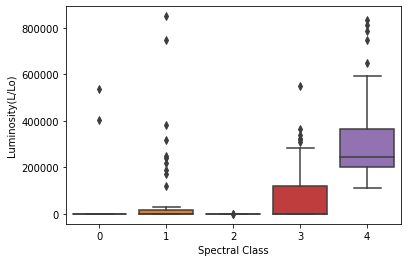

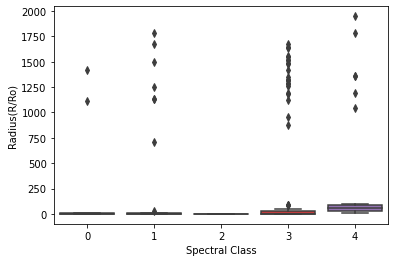

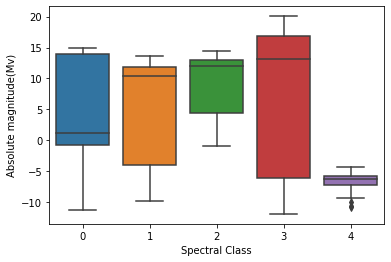

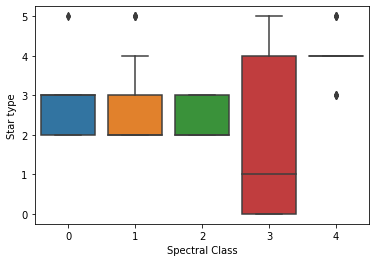

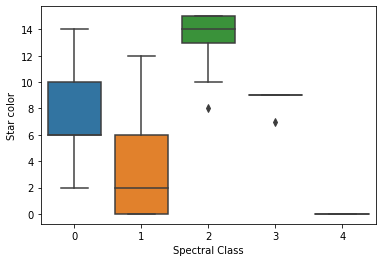

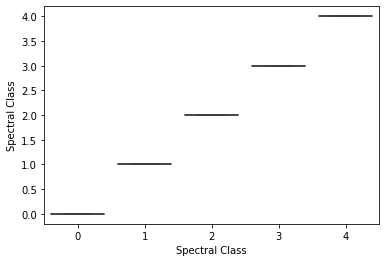

In [79]:
encoder = LabelEncoder()
for i in stars_data.columns:
    if stars_data[i].dtype == "object" or stars_data[i].dtype == "str":
        stars_data[i] = LabelEncoder().fit_transform(stars_data[i])
for i in stars_data.columns:
    figure = plt.figure()
    sea.boxplot(x='Spectral Class', y=stars_data[i], data=stars_data)


# **Pairplot**

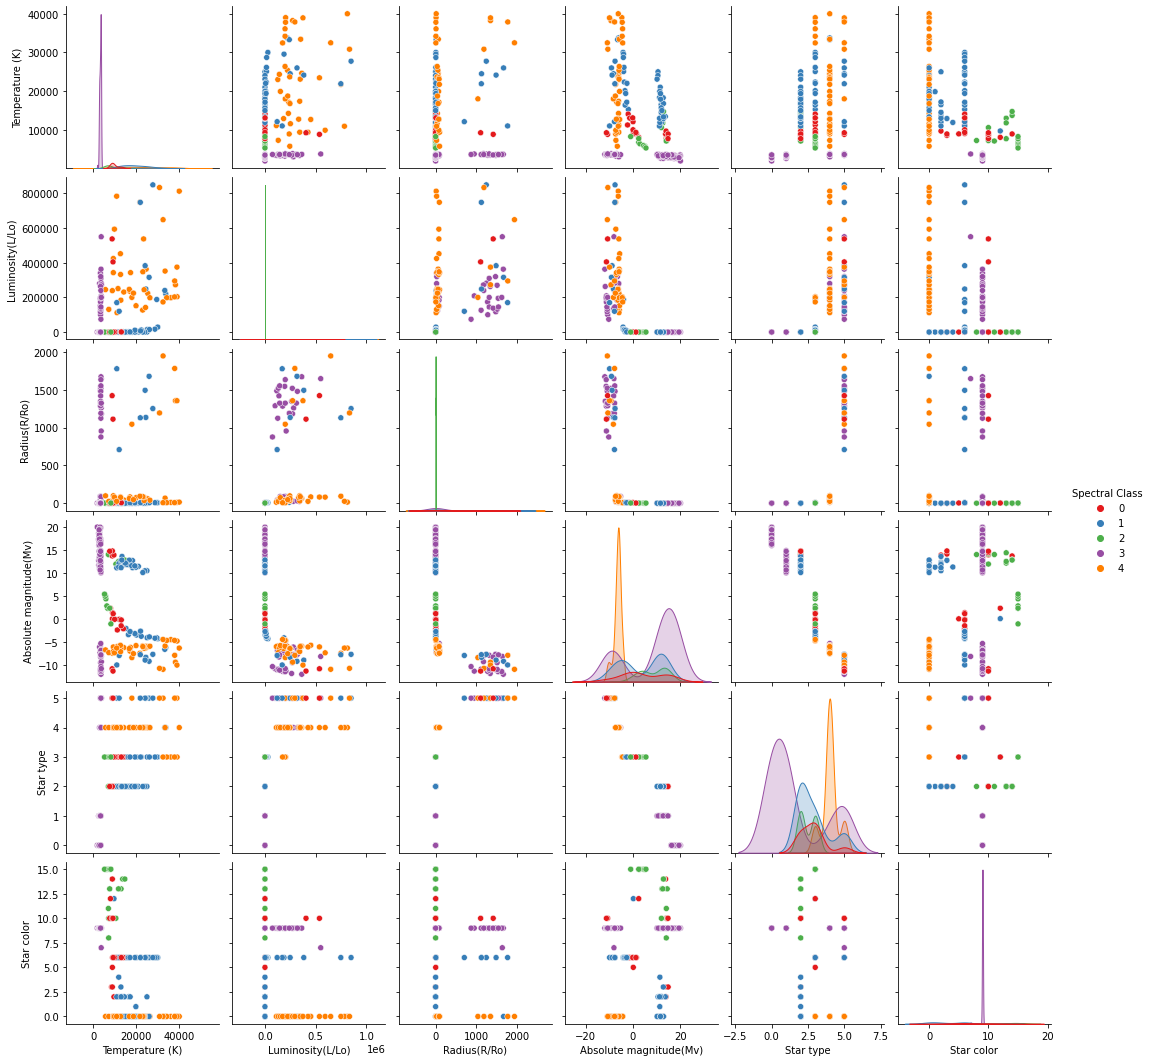

In [80]:
sea.pairplot(stars_data, hue="Spectral Class", palette = 'Set1')

# **Завдання 4**

In [81]:
X = stars_data.drop(["Spectral Class"], axis=1)
y = stars_data["Spectral Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [82]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

# **Завдання 5**

# **kNN**

In [83]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [84]:
# results
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.7714285714285715
[[ 5  3  1  0  0]
 [ 1 11  0  1  3]
 [ 0  2  1  0  0]
 [ 0  0  0 29  1]
 [ 0  0  0  4  8]]
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.69      0.69      0.69        16
           2       0.50      0.33      0.40         3
           3       0.85      0.97      0.91        30
           4       0.67      0.67      0.67        12

    accuracy                           0.77        70
   macro avg       0.71      0.64      0.67        70
weighted avg       0.77      0.77      0.76        70



# *Пошук оптимального числа сусідів*

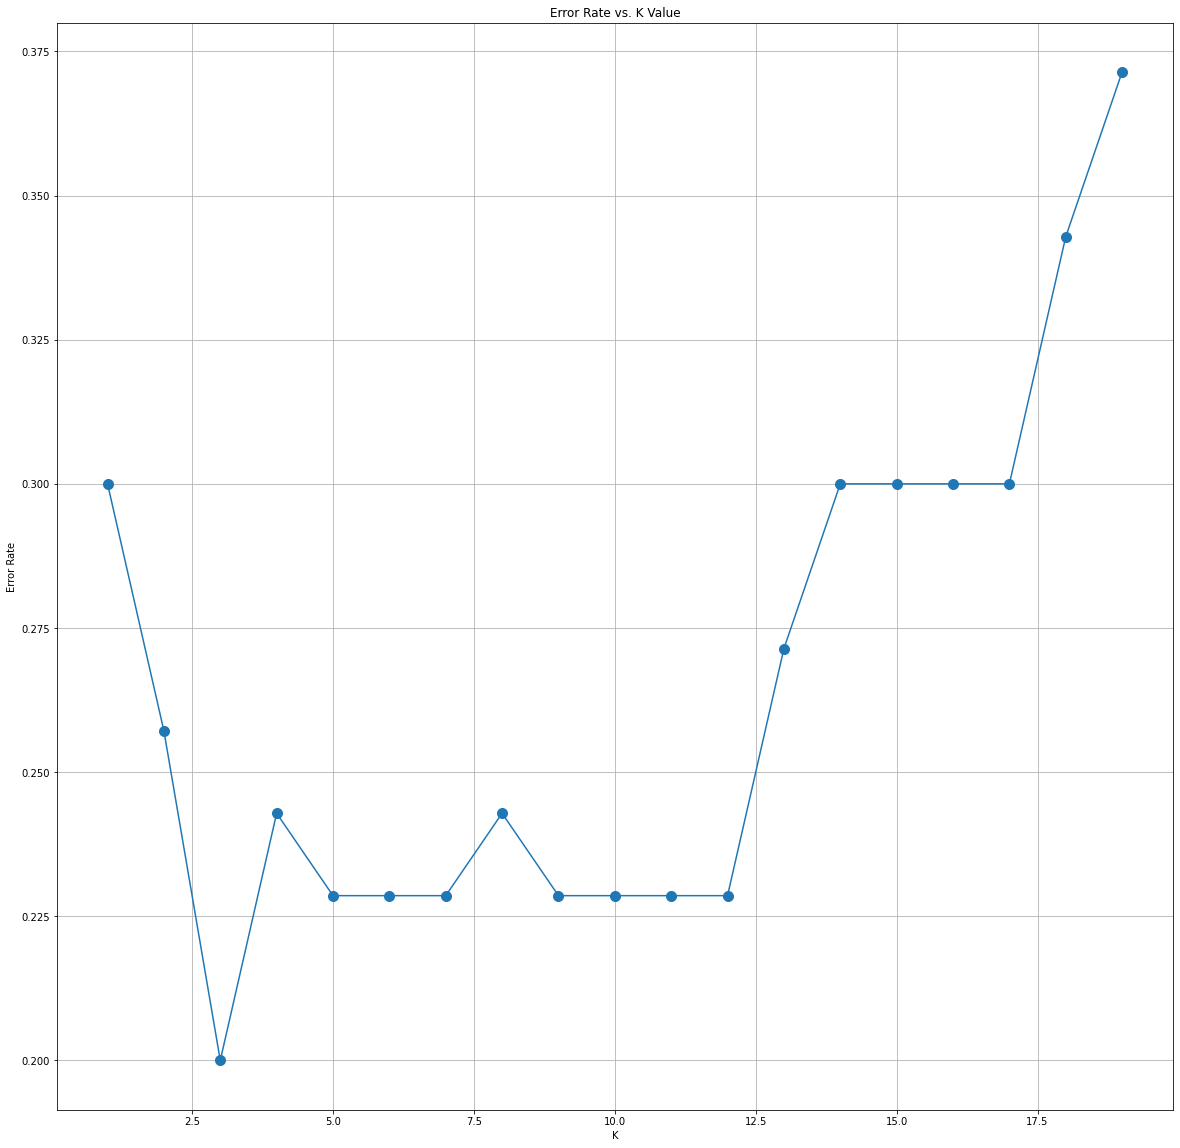

In [85]:
error = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(20,20))
plt.plot(range(1,20), error, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

**Найменша помилка буде при числі сусідів 3**

In [94]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.8
[[ 5  3  1  0  0]
 [ 1 11  0  1  3]
 [ 0  2  1  0  0]
 [ 0  0  0 29  1]
 [ 0  1  0  1 10]]
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.65      0.69      0.67        16
           2       0.50      0.33      0.40         3
           3       0.94      0.97      0.95        30
           4       0.71      0.83      0.77        12

    accuracy                           0.80        70
   macro avg       0.73      0.68      0.69        70
weighted avg       0.80      0.80      0.79        70



# **Дерево прийняття рішень**

In [87]:
dicision_tree = DecisionTreeClassifier(criterion='gini')
dicision_tree.fit(X_train, y_train)
tree_pred = dicision_tree.predict(X_test)

# results
print(accuracy_score(y_test,tree_pred))
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

0.9428571428571428
[[ 8  0  1  0  0]
 [ 0 15  1  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 30  0]
 [ 0  2  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.88      0.94      0.91        16
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00        30
           4       1.00      0.83      0.91        12

    accuracy                           0.94        70
   macro avg       0.90      0.93      0.90        70
weighted avg       0.96      0.94      0.95        70



# **SVM**

In [88]:
svm = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

# results
print(accuracy_score(y_test,svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

0.42857142857142855
[[ 0  0  0  9  0]
 [ 0  0  0 16  0]
 [ 0  0  0  3  0]
 [ 0  0  0 30  0]
 [ 0  0  0 12  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         3
           3       0.43      1.00      0.60        30
           4       0.00      0.00      0.00        12

    accuracy                           0.43        70
   macro avg       0.09      0.20      0.12        70
weighted avg       0.18      0.43      0.26        70



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Як видно з матриці для деяких классів крім одного не було передбачено жодного значення, можливо результат покращиться у моделі SVM з оптимальними параметрами, пыдыбраними за допомогою градієнтного спуску**

In [89]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [93]:
svm = SVC(C=1, gamma = 0.0001, kernel = 'rbf')
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

#results
print(accuracy_score(y_test,svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

0.45714285714285713
[[ 0  0  1  8  0]
 [ 0  2  0 14  0]
 [ 0  1  0  2  0]
 [ 0  0  0 30  0]
 [ 0  0  0 12  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.67      0.12      0.21        16
           2       0.00      0.00      0.00         3
           3       0.45      1.00      0.62        30
           4       0.00      0.00      0.00        12

    accuracy                           0.46        70
   macro avg       0.22      0.23      0.17        70
weighted avg       0.35      0.46      0.32        70



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Вдалося довести точність до 0.45, але для деяких классів однаково не передбачено жодного значення**

# **Random Forest**

In [91]:
random_forest = RandomForestClassifier(n_estimators=500, random_state=42)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)

#results
print(accuracy_score(y_test,random_forest_pred))
print(confusion_matrix(y_test, random_forest_pred))
print(classification_report(y_test, random_forest_pred))

0.9571428571428572
[[ 8  0  1  0  0]
 [ 2 14  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 30  0]
 [ 0  0  0  0 12]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       1.00      0.88      0.93        16
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        12

    accuracy                           0.96        70
   macro avg       0.91      0.95      0.93        70
weighted avg       0.96      0.96      0.96        70



# **AdaBoost**

In [92]:
ada_boost = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = ada_boost.fit(X_train, y_train)
y_pred = model.predict(X_test)

#results
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7571428571428571
[[ 0  9  0  0  0]
 [ 0 11  0  0  5]
 [ 0  3  0  0  0]
 [ 0  0  0 30  0]
 [ 0  0  0  0 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.48      0.69      0.56        16
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00        30
           4       0.71      1.00      0.83        12

    accuracy                           0.76        70
   macro avg       0.44      0.54      0.48        70
weighted avg       0.66      0.76      0.70        70



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
